In [2]:
import requests
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from os import listdir
from os.path import isfile, join

In [3]:
# Where my json files are located
onlyfiles = [f for f in listdir("../MyFaceitData/MatchStats") if isfile(join("../MyFaceitData/MatchStats", f))]

In [4]:
#Rename columns
def rename_cols(text: str):
    text = text.split(".")[1]
    text = text.split(" ")
    text = "".join(list(map(str.capitalize, text)))
    return text

In [5]:
def create_df_from_json():
    df = pd.DataFrame()
    for ID in onlyfiles:
        path = f"../MyFaceitData/MatchStats/{ID}"
        #print(path)
        with open(path, "r") as file:
           obj = json.load(file)["items"]
           obj = pd.json_normalize(obj)
        obj = obj.rename(columns=rename_cols)
        df = pd.concat([df, obj], ignore_index=True)
    return df


In [6]:
df_jj = create_df_from_json()

In [7]:
# Create picklle file if there are large amounts of json files
df_jj.to_pickle("JJStats.pkl", compression="bz2")

In [22]:
df_jj = pd.read_pickle("JJStats.pkl", compression="bz2")

In [23]:
df_jj

,Team,MatchId,Kills,BestOf,Headshots%,Map,CompetitionId,SecondHalfScore,K/dRatio,FinalScore,...,QuadroKills,PlayerId,Nickname,FirstHalfScore,CreatedAt,MatchRound,Deaths,TripleKills,Game,PentaKills
0,Poundland,1-31717cf7-fd79-42c9-8e90-fd3ccf5947b4,6,3,33,de_ancient,409c8bab-ff43-4d18-92e8-043932a9638a,2,0.3,9,...,0,9a3bf080-a281-4e45-b1c8-2a90c7423d25,-JJ-,7,2023-09-26T23:20:33.756Z,3,20,0,csgo,0
1,Poundland,1-31717cf7-fd79-42c9-8e90-fd3ccf5947b4,22,3,36,de_anubis,409c8bab-ff43-4d18-92e8-043932a9638a,7,0.85,19,...,0,9a3bf080-a281-4e45-b1c8-2a90c7423d25,-JJ-,8,2023-09-26T22:27:04.491Z,2,26,1,csgo,0
2,Poundland,1-31717cf7-fd79-42c9-8e90-fd3ccf5947b4,13,3,54,de_overpass,409c8bab-ff43-4d18-92e8-043932a9638a,1,0.76,6,...,1,9a3bf080-a281-4e45-b1c8-2a90c7423d25,-JJ-,5,2023-09-26T21:12:04.215Z,1,17,1,csgo,0
3,Poundland,1-ed6980d7-3ced-4806-b79a-73e699492202,16,2,62,de_mirage,e056975c-09ff-4290-8fcd-596cd7295152,7,0.76,16,...,0,9a3bf080-a281-4e45-b1c8-2a90c7423d25,-JJ-,9,2023-09-18T19:28:20.413Z,1,21,2,csgo,0
4,Poundland,1-65c141fa-8547-452f-a712-d67a1969864c,22,2,50,de_inferno,e056975c-09ff-4290-8fcd-596cd7295152,5,1.69,16,...,0,9a3bf080-a281-4e45-b1c8-2a90c7423d25,-JJ-,11,2023-09-17T20:55:33.525Z,1,13,1,csgo,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860,team_Toby__,1-5af630de-eabb-45bb-ae49-c6096b172e19,20,1,45,de_mirage,42e160fc-2651-4fa5-9a9b-829199e27adb,5,0.95,9,...,0,9a3bf080-a281-4e45-b1c8-2a90c7423d25,Pot8ers,4,2020-03-28T20:44:15.139Z,1,21,1,csgo,0
1861,team_Toby__,1-871c3b20-f700-4aa3-bb6e-778219f6c9a9,34,1,41,de_mirage,42e160fc-2651-4fa5-9a9b-829199e27adb,6,1.48,17,...,0,9a3bf080-a281-4e45-b1c8-2a90c7423d25,Pot8ers,9,2020-03-28T19:25:18.575Z,1,23,2,csgo,0
1862,team_Pot8ers,1-a54d91e3-69ce-4fd7-8743-cd1f2261c992,22,1,45,de_mirage,42e160fc-2651-4fa5-9a9b-829199e27adb,5,3.67,16,...,0,9a3bf080-a281-4e45-b1c8-2a90c7423d25,Pot8ers,11,2020-03-27T22:48:53.975Z,1,6,2,csgo,1
1863,team_Pot8ers,1-00b2a5d3-8aad-4947-8416-122646a76298,12,1,42,de_mirage,42e160fc-2651-4fa5-9a9b-829199e27adb,4,0.55,9,...,0,9a3bf080-a281-4e45-b1c8-2a90c7423d25,Pot8ers,5,2020-03-27T14:02:29.416Z,1,22,0,csgo,0


In [24]:
# Put datatypes into df and cleansed df
type = {
    "PlayerId": str,
    "CreatedAt": "datetime64[ns]",
    "Kills": int,
    "Deaths": int,
    "Assists": int,
    "K/dRatio": float,
    "K/rRatio": float,
    "Headshots": int,
    "Headshots%": int,
    "FirstHalfScore": int,
    "SecondHalfScore": int,
    "TripleKills": int,
    "QuadroKills": int,
    "PentaKills": int,
    "Headshots%": int,
    "Mvps": int,
    "OvertimeScore": int,
    "Rounds": int,
    "Result": int,
}

df_jj = df_jj.astype(type, errors="ignore")
df_jj.dropna(how="any", inplace=True)
df_jj['Score'] = df_jj['Score'].str.replace(" / ", ":")
df_jj
#df_jj['Result'] = df_jj["Result"].astype(int).replace({1: "Win", 0: "Loss"})


,Team,MatchId,Kills,BestOf,Headshots%,Map,CompetitionId,SecondHalfScore,K/dRatio,FinalScore,...,QuadroKills,PlayerId,Nickname,FirstHalfScore,CreatedAt,MatchRound,Deaths,TripleKills,Game,PentaKills
0,Poundland,1-31717cf7-fd79-42c9-8e90-fd3ccf5947b4,6,3,33,de_ancient,409c8bab-ff43-4d18-92e8-043932a9638a,2,0.30,9,...,0,9a3bf080-a281-4e45-b1c8-2a90c7423d25,-JJ-,7,2023-09-26T23:20:33.756Z,3,20,0,csgo,0
1,Poundland,1-31717cf7-fd79-42c9-8e90-fd3ccf5947b4,22,3,36,de_anubis,409c8bab-ff43-4d18-92e8-043932a9638a,7,0.85,19,...,0,9a3bf080-a281-4e45-b1c8-2a90c7423d25,-JJ-,8,2023-09-26T22:27:04.491Z,2,26,1,csgo,0
2,Poundland,1-31717cf7-fd79-42c9-8e90-fd3ccf5947b4,13,3,54,de_overpass,409c8bab-ff43-4d18-92e8-043932a9638a,1,0.76,6,...,1,9a3bf080-a281-4e45-b1c8-2a90c7423d25,-JJ-,5,2023-09-26T21:12:04.215Z,1,17,1,csgo,0
3,Poundland,1-ed6980d7-3ced-4806-b79a-73e699492202,16,2,62,de_mirage,e056975c-09ff-4290-8fcd-596cd7295152,7,0.76,16,...,0,9a3bf080-a281-4e45-b1c8-2a90c7423d25,-JJ-,9,2023-09-18T19:28:20.413Z,1,21,2,csgo,0
4,Poundland,1-65c141fa-8547-452f-a712-d67a1969864c,22,2,50,de_inferno,e056975c-09ff-4290-8fcd-596cd7295152,5,1.69,16,...,0,9a3bf080-a281-4e45-b1c8-2a90c7423d25,-JJ-,11,2023-09-17T20:55:33.525Z,1,13,1,csgo,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860,team_Toby__,1-5af630de-eabb-45bb-ae49-c6096b172e19,20,1,45,de_mirage,42e160fc-2651-4fa5-9a9b-829199e27adb,5,0.95,9,...,0,9a3bf080-a281-4e45-b1c8-2a90c7423d25,Pot8ers,4,2020-03-28T20:44:15.139Z,1,21,1,csgo,0
1861,team_Toby__,1-871c3b20-f700-4aa3-bb6e-778219f6c9a9,34,1,41,de_mirage,42e160fc-2651-4fa5-9a9b-829199e27adb,6,1.48,17,...,0,9a3bf080-a281-4e45-b1c8-2a90c7423d25,Pot8ers,9,2020-03-28T19:25:18.575Z,1,23,2,csgo,0
1862,team_Pot8ers,1-a54d91e3-69ce-4fd7-8743-cd1f2261c992,22,1,45,de_mirage,42e160fc-2651-4fa5-9a9b-829199e27adb,5,3.67,16,...,0,9a3bf080-a281-4e45-b1c8-2a90c7423d25,Pot8ers,11,2020-03-27T22:48:53.975Z,1,6,2,csgo,1
1863,team_Pot8ers,1-00b2a5d3-8aad-4947-8416-122646a76298,12,1,42,de_mirage,42e160fc-2651-4fa5-9a9b-829199e27adb,4,0.55,9,...,0,9a3bf080-a281-4e45-b1c8-2a90c7423d25,Pot8ers,5,2020-03-27T14:02:29.416Z,1,22,0,csgo,0


In [11]:
# Clean CreateAt Column
df_jj['CreatedAt'] = df_jj['CreatedAt'].map(lambda x: x.lstrip('+-').rstrip('Z'))
df_jj= df_jj[df_jj['CreatedAt'].str.len() > 22]

In [12]:
df_jj['CreatedAt'] = df_jj['CreatedAt'].astype("datetime64[ns]")

In [13]:
df_jj["DateOrdinal"] = df_jj['CreatedAt'].apply(lambda x: x.toordinal())

In [14]:
df_jj["Year"] = df_jj['CreatedAt'].dt.year
df_jj["Month"] = df_jj['CreatedAt'].dt.month
df_jj["Date"] = df_jj['CreatedAt'].dt.day

In [15]:
rename_all_maps = {
    "de_mirage": "Mirage",
    "de_inferno": "Inferno",
    "de_train": "Train",
    "de_overpass": "Overpass",
    "de_cache": "Cache",
    "de_nuke": "Nuke",
    "de_vertigo": "Vertigo",
    "de_dust2": "Dust2",
    "de_ancient": "Ancient",
    "de_cbble": "Cobblestone",
    "de_anubis": "Anubis"
}

df_jj = df_jj.replace({"Map": rename_all_maps})
df_jj.sort_values(by="CreatedAt", ascending=True, inplace=True)
df_jj = df_jj.groupby('Map').filter(lambda x: len(x)>1)

In [16]:
df_jj

,Team,MatchId,Kills,BestOf,Headshots%,Map,CompetitionId,SecondHalfScore,K/dRatio,FinalScore,...,CreatedAt,MatchRound,Deaths,TripleKills,Game,PentaKills,DateOrdinal,Year,Month,Date
1064,team_Maurizi0,7f0f5e26-d1da-4629-b4fe-076f16934818,5,1,40,Train,,0,0.33,2,...,2018-02-24 02:34:38.297,1,15,0,csgo,0,736749,2018,2,24
1063,team_Future803,203eb729-5ec9-4d3d-b017-1e89951809a9,7,1,57,Mirage,,0,0.41,2,...,2018-02-24 15:46:07.887,1,17,0,csgo,0,736749,2018,2,24
1062,team_m9rth,935e2f14-f1b2-41a5-bd9d-23bf5c5ed9dd,26,1,54,Inferno,,11,1.24,16,...,2018-03-02 23:40:00.689,1,21,3,csgo,0,736755,2018,3,2
1061,team_-JL-,57a319f9-6cbf-4648-8a7e-cca2ae1a272f,21,1,43,Train,,5,1.11,16,...,2018-03-03 00:24:16.582,1,19,2,csgo,0,736756,2018,3,3
1060,team_-JL-,172a2bb2-808e-4407-a725-607d31a328b4,21,1,38,Train,,5,1.24,16,...,2018-03-03 01:03:46.874,1,17,1,csgo,0,736756,2018,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,Poundland,1-65c141fa-8547-452f-a712-d67a1969864c,22,2,50,Inferno,e056975c-09ff-4290-8fcd-596cd7295152,5,1.69,16,...,2023-09-17 20:55:33.525,1,13,1,csgo,0,738780,2023,9,17
3,Poundland,1-ed6980d7-3ced-4806-b79a-73e699492202,16,2,62,Mirage,e056975c-09ff-4290-8fcd-596cd7295152,7,0.76,16,...,2023-09-18 19:28:20.413,1,21,2,csgo,0,738781,2023,9,18
2,Poundland,1-31717cf7-fd79-42c9-8e90-fd3ccf5947b4,13,3,54,Overpass,409c8bab-ff43-4d18-92e8-043932a9638a,1,0.76,6,...,2023-09-26 21:12:04.215,1,17,1,csgo,0,738789,2023,9,26
1,Poundland,1-31717cf7-fd79-42c9-8e90-fd3ccf5947b4,22,3,36,Anubis,409c8bab-ff43-4d18-92e8-043932a9638a,7,0.85,19,...,2023-09-26 22:27:04.491,2,26,1,csgo,0,738789,2023,9,26


In [17]:
df_jj["Result"].loc[df_jj["Map"] == "Dust2"]

1056    1
1044    1
1041    1
1008    0
973     0
972     1
931     0
839     0
824     0
799     0
777     0
721     0
670     0
467     1
400     0
366     0
306     0
166     0
1696    0
1674    0
1669    0
1661    0
1656    0
1649    0
1648    1
1304    0
1293    0
1283    0
1264    1
1259    0
1222    0
1142    0
287     0
226     0
204     0
Name: Result, dtype: int32

In [18]:
#Displaying JJ stats (My Own)

#Displaying Maps and Other stats

Maps_Stats_df_jj = (
    df_jj.groupby(by="Map").aggregate(
        {
            "Map": 'count',
            "Kills": sum,
            "Assists": sum,
            "Deaths": sum,
            "Mvps": sum,
            "Headshots": 'mean',
            "Headshots%": 'mean',
            "Result": sum
        }
    ).rename(({"Map": "Matches", "Result": "Wins"}), axis = 1)
)


C:\Users\jaceh\AppData\Local\Temp\ipykernel_15960\2991413511.py:6: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_jj.groupby(by="Map").aggregate(


In [19]:
Maps_Stats_df_jj

,Matches,Kills,Assists,Deaths,Mvps,Headshots,Headshots%,Wins
Map,,,,,,,,
Ancient,15,232,52,298,32,5.400000,34.733333,6
Anubis,4,81,12,79,9,8.750000,44.250000,2
Cache,154,2798,513,2828,404,7.532468,42.675325,84
Cobblestone,13,255,45,235,35,6.769231,34.230769,7
Dust2,35,596,117,728,58,8.428571,50.171429,7
Inferno,377,6968,1205,6994,1007,8.803714,47.657825,189
Mirage,528,9413,1564,9465,1308,8.111742,46.035985,265
Nuke,101,1780,365,1901,262,7.900990,45.306931,50
Overpass,177,3167,609,3346,431,7.632768,42.621469,97


In [20]:
Maps_Stats_df_jj["Losses"] = (Maps_Stats_df_jj["Matches"] - Maps_Stats_df_jj["Wins"]).astype(int)
Maps_Stats_df_jj["Winrate%"] = (((Maps_Stats_df_jj["Wins"] / Maps_Stats_df_jj["Matches"]) * 100).round(2)).astype(float)
Maps_Stats_df_jj["Headshots"] = (Maps_Stats_df_jj["Headshots"].apply(lambda x: round(x,2))).astype(float)
Maps_Stats_df_jj["Headshots%"] = (Maps_Stats_df_jj["Headshots%"].apply(lambda x: round(x,2))).astype(float)
Maps_Stats_df_jj["Matches"].astype(int)
Maps_Stats_df_jj.sort_values(by="Matches", ascending=False, inplace=True)
Maps_Stats_df_jj

,Matches,Kills,Assists,Deaths,Mvps,Headshots,Headshots%,Wins,Losses,Winrate%
Map,,,,,,,,,,
Mirage,528,9413,1564,9465,1308,8.11,46.04,265,263,50.19
Inferno,377,6968,1205,6994,1007,8.80,47.66,189,188,50.13
Train,203,3851,700,3671,558,8.33,44.53,115,88,56.65
Overpass,177,3167,609,3346,431,7.63,42.62,97,80,54.80
Cache,154,2798,513,2828,404,7.53,42.68,84,70,54.55
Nuke,101,1780,365,1901,262,7.90,45.31,50,51,49.50
Vertigo,64,1196,271,1251,175,8.27,44.77,36,28,56.25
Dust2,35,596,117,728,58,8.43,50.17,7,28,20.00
Ancient,15,232,52,298,32,5.40,34.73,6,9,40.00


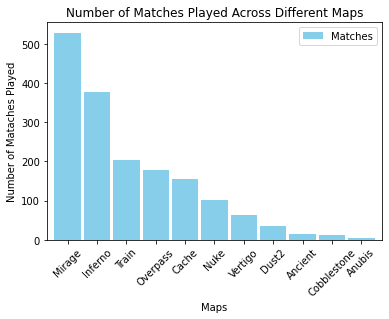

In [21]:
#Number of matches played across different maps
Maps_Stats_df_jj.plot.bar(y = "Matches", color = "skyblue", title = 'Number of Matches Played Across Different Maps', width = 0.9)
plt.xticks(rotation=45)
plt.xlabel('Maps')
plt.ylabel('Number of Mataches Played')


def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

#plt.show()